#Inicio


In [139]:
!pip install pennylane

In [140]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import itertools
import torch
from torch import nn
from tqdm.notebook import tqdm
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

In [141]:
dataset=pd.read_csv('/content/alunos.csv', sep=";")
dataset.head()

<ipython-input-141-d2245c443334>:1: DtypeWarning: Columns (40,41,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,61,62,63,92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('/content/alunos.csv', sep=";")


,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,...,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,10,11,2,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,11,12,2,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,2020,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,2,3,1,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,2020,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [142]:


colunas_mantidas = [
    'ID_ALUNO', 'ID_MATRICULA', 'NU_MES', 'NU_ANO', 'NU_IDADE',
    'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA','TP_LOCALIZACAO',
    'IN_AUTISMO']

dataset = dataset[colunas_mantidas]

dataset.head()


,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AUTISMO
0,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,11,11,2,3,4,1,NaN
1,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,12,12,2,1,4,1,NaN
2,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,4,1,NaN
3,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,3,3,1,3,4,1,NaN
4,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,4,1,NaN


In [143]:

dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].fillna(0)

dataset['IN_AUTISMO'] = dataset['IN_AUTISMO'].apply(lambda x: 1 if x != 0 else 0)

dataset.head()


,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AUTISMO
0,790269B39914035DE33BCB827C4F2D83,435039863,12,2009,11,11,2,3,4,1,0
1,311363D9AB845EB53D7D6F12FE657CF9,351780516,6,2008,12,12,2,1,4,1,0
2,0CFD8C53003C50D16BC9DE8E1CAFF658,419928618,4,2008,12,12,2,1,4,1,0
3,D295E28AA9D03AC4586E93B822E86C93,422248877,6,2017,3,3,1,3,4,1,0
4,44066D73C8A75DD9611F8272BE80AC74,404705028,5,2013,7,7,1,1,4,1,0


In [144]:

dataset['TP_COR_RACA'] = dataset['TP_COR_RACA'].replace({0: 'Não declarada', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})

print(dataset['TP_COR_RACA'].unique())


['Parda' 'Branca' 'Não declarada' 'Preta' 'Amarela' 'Indígena']


In [145]:

dataset['TP_DEPENDENCIA'] = dataset['TP_DEPENDENCIA'].replace({ 1: 'Federal', 2: 'Municipal', 3: 'Estadual', 4: 'Privada'})

print(dataset['TP_DEPENDENCIA'].unique())

['Privada' 'Municipal' 'Federal' 'Estadual']


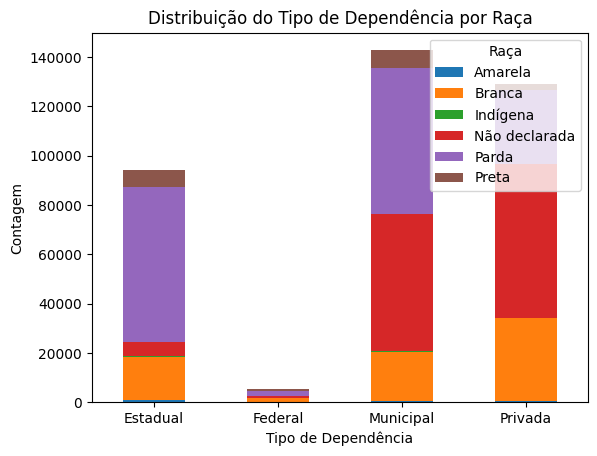

In [146]:
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(dataset['TP_DEPENDENCIA'], dataset['TP_COR_RACA'])

cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Tipo de Dependência')
plt.ylabel('Contagem')
plt.title('Distribuição do Tipo de Dependência por Raça')
plt.xticks(rotation=0)
plt.legend(title='Raça', loc='upper right')
plt.show()


In [147]:
dataset = dataset.drop(columns=['ID_ALUNO','ID_MATRICULA','NU_MES','TP_LOCALIZACAO' ])
dataset.head(10)

,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,IN_AUTISMO
0,2009,11,11,2,Parda,Privada,0
1,2008,12,12,2,Branca,Privada,0
2,2008,12,12,2,Branca,Privada,0
3,2017,3,3,1,Parda,Privada,0
4,2013,7,7,1,Branca,Privada,0
5,2012,8,8,1,Branca,Privada,0
6,2008,12,12,1,Não declarada,Privada,0
7,2012,8,8,2,Branca,Privada,0
8,2014,6,6,2,Não declarada,Privada,0
9,2015,5,5,2,Branca,Privada,0


In [148]:
dataset = dataset.loc[(dataset['TP_COR_RACA'] != 'Não declarada') & (dataset['TP_COR_RACA'] != 'Indígena')]

print(dataset['TP_COR_RACA'].unique())


['Parda' 'Branca' 'Preta' 'Amarela']


In [149]:

dataset["TP_COR_RACA"] = dataset["TP_COR_RACA"].map({"Branca":0,"Parda":1,"Preta":2,"Amarela":1})
dataset.head(10)

<ipython-input-149-29bad66841c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["TP_COR_RACA"] = dataset["TP_COR_RACA"].map({"Branca":0,"Parda":1,"Preta":2,"Amarela":1})


,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA,IN_AUTISMO
0,2009,11,11,2,1,Privada,0
1,2008,12,12,2,0,Privada,0
2,2008,12,12,2,0,Privada,0
3,2017,3,3,1,1,Privada,0
4,2013,7,7,1,0,Privada,0
5,2012,8,8,1,0,Privada,0
7,2012,8,8,2,0,Privada,0
9,2015,5,5,2,0,Privada,0
13,1994,26,26,2,1,Municipal,0
15,2007,13,13,1,0,Privada,0


In [150]:
print(dataset['TP_COR_RACA'].unique())

[1 0 2]


In [151]:
dataset.describe()

,NU_ANO,NU_IDADE,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_AUTISMO
count,245430.000000,245430.000000,245430.000000,245430.000000,245430.000000,245430.000000
mean,2006.237334,13.762666,13.762666,1.499218,0.773145,0.010997
std,8.649125,8.649125,8.649125,0.500000,0.560639,0.104289
min,1933.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2003.000000,8.000000,8.000000,1.000000,0.000000,0.000000
50%,2007.000000,13.000000,13.000000,1.000000,1.000000,0.000000
75%,2012.000000,17.000000,17.000000,2.000000,1.000000,0.000000
max,2020.000000,87.000000,87.000000,2.000000,2.000000,1.000000


In [152]:

dataset = dataset[[col for col in dataset if col != 'TP_COR_RACA'] + ['TP_COR_RACA']]
dataset.head()

,NU_ANO,NU_IDADE,NU_IDADE,NU_IDADE,NU_IDADE,TP_SEXO,TP_DEPENDENCIA,IN_AUTISMO,TP_COR_RACA
0,2009,11,11,11,11,2,Privada,0,1
1,2008,12,12,12,12,2,Privada,0,0
2,2008,12,12,12,12,2,Privada,0,0
3,2017,3,3,3,3,1,Privada,0,1
4,2013,7,7,7,7,1,Privada,0,0


In [153]:
dataset = dataset.loc[:,~dataset.columns.duplicated()]
print(dataset.head())

   NU_ANO  NU_IDADE  TP_SEXO TP_DEPENDENCIA  IN_AUTISMO  TP_COR_RACA
0    2009        11        2        Privada           0            1
1    2008        12        2        Privada           0            0
2    2008        12        2        Privada           0            0
3    2017         3        1        Privada           0            1
4    2013         7        1        Privada           0            0


In [154]:
dataset['TP_DEPENDENCIA'] = dataset['TP_DEPENDENCIA'].replace({ 'Federal':10 , 'Municipal':4 , 'Estadual':6 , 'Privada':8 })
print(dataset['TP_DEPENDENCIA'].unique())
dataset.head()

[ 8  4 10  6]


,NU_ANO,NU_IDADE,TP_SEXO,TP_DEPENDENCIA,IN_AUTISMO,TP_COR_RACA
0,2009,11,2,8,0,1
1,2008,12,2,8,0,0
2,2008,12,2,8,0,0
3,2017,3,1,8,0,1
4,2013,7,1,8,0,0


In [155]:
dataset = dataset.drop(columns=['TP_DEPENDENCIA' ])
dataset=dataset.head(200)
dataset.head()

,NU_ANO,NU_IDADE,TP_SEXO,IN_AUTISMO,TP_COR_RACA
0,2009,11,2,0,1
1,2008,12,2,0,0
2,2008,12,2,0,0
3,2017,3,1,0,1
4,2013,7,1,0,0


In [156]:
cols = list(dataset.columns)[:-1]
col_pairs = list(itertools.product(cols,cols))
col_pairs = list(filter(lambda x: (x[0]!=x[1]) ,col_pairs))
print(len(col_pairs))

12


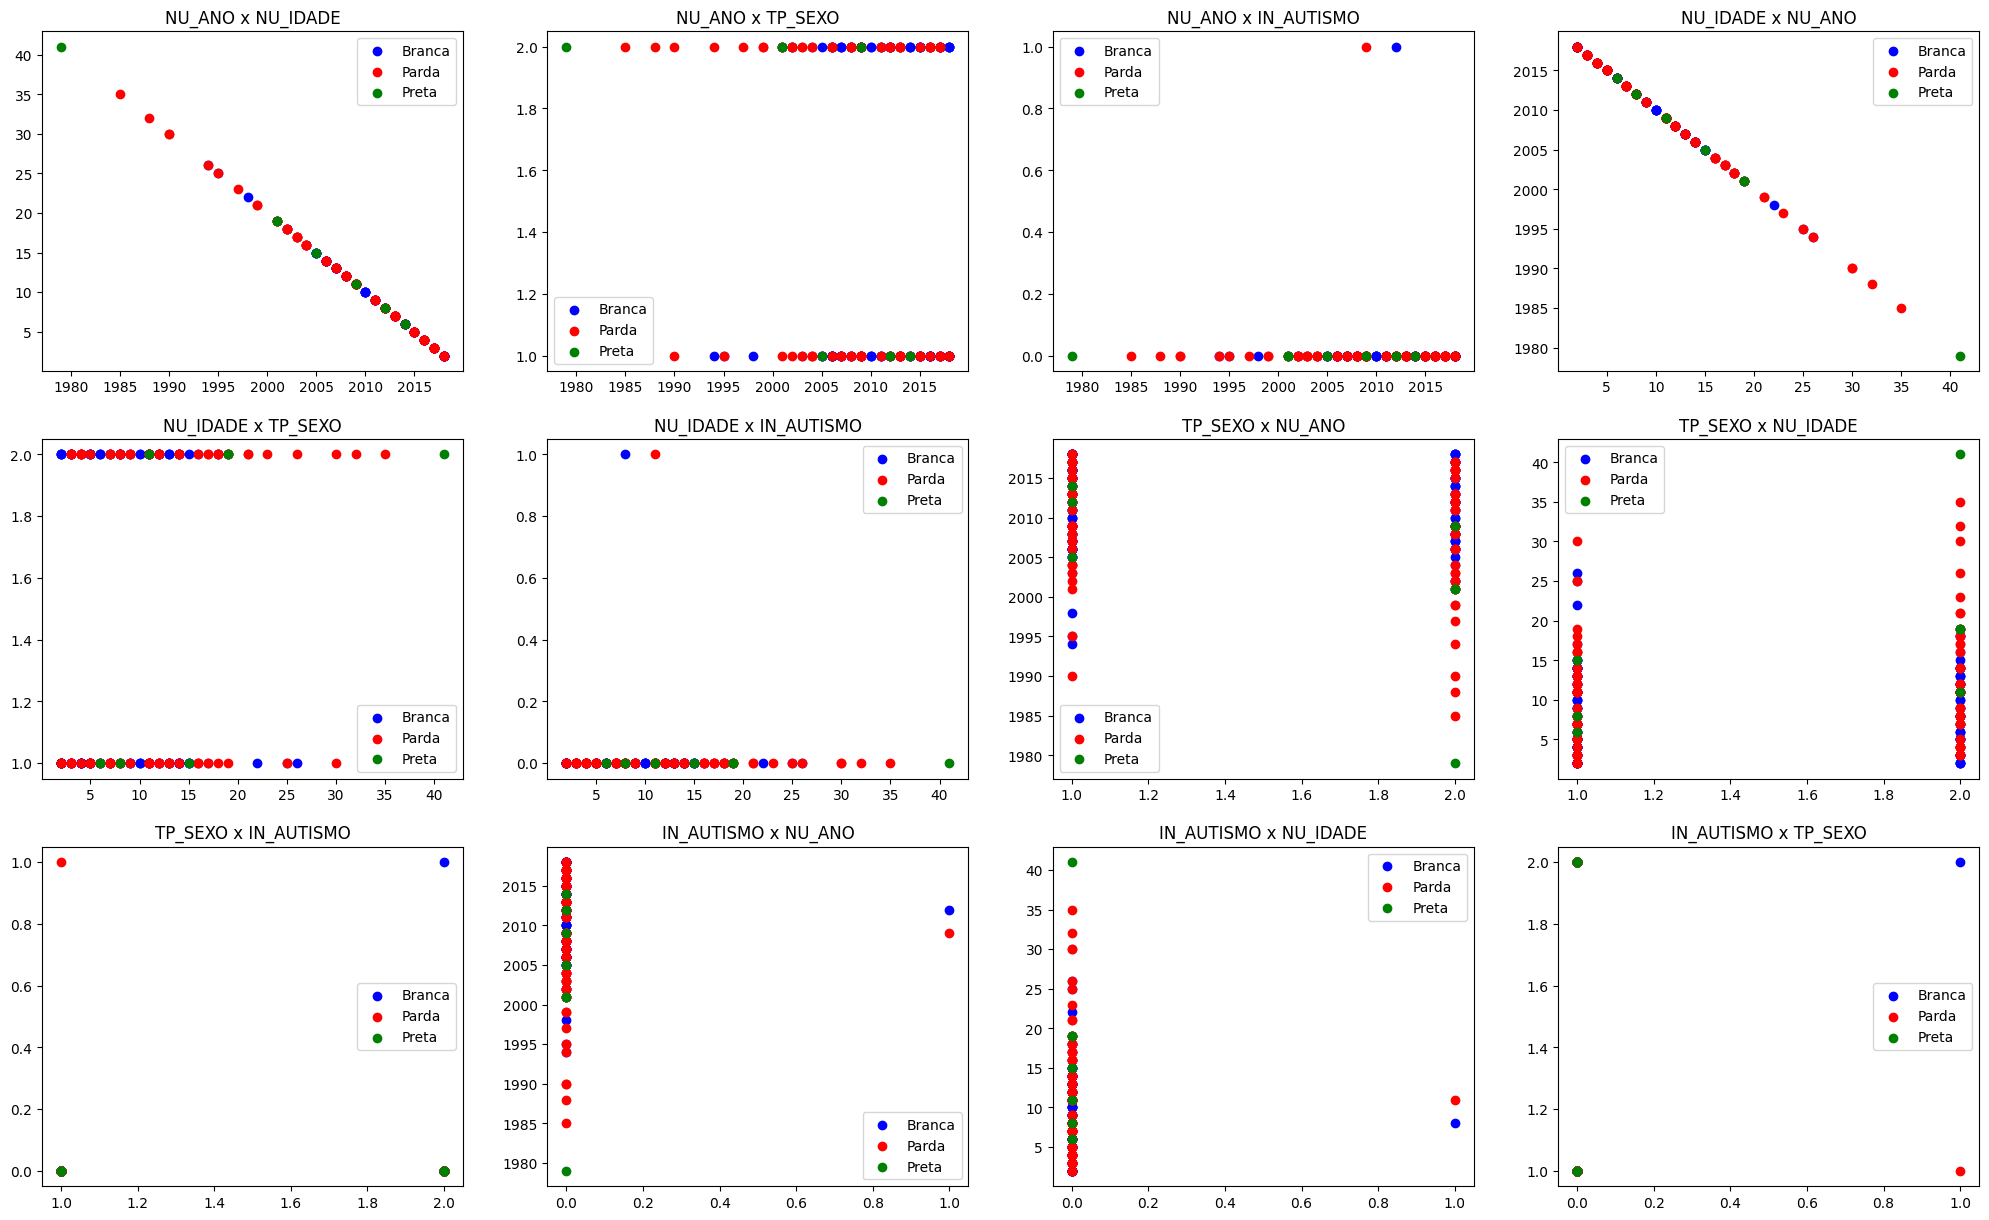

In [157]:
fig = plt.figure(figsize=(25, 15))

for i,(col4,col1) in enumerate(col_pairs):
    plot = plt.subplot(3,4, i+1)
    plot.set_title(f"{col4} x {col1}")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==0], dataset[col1][dataset["TP_COR_RACA"]==0], c="b", marker="o",label="Branca")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==1], dataset[col1][dataset["TP_COR_RACA"]==1], c="r", marker="o",label="Parda")
    plot.scatter(dataset[col4][dataset["TP_COR_RACA"]==2], dataset[col1][dataset["TP_COR_RACA"]==2], c="g", marker="o",label="Preta")
    plot.legend()

plt.show()


imprimindo uma amostra de dados para a verificação

In [158]:
from pennylane import numpy as np
import pennylane as qml

X = dataset.drop(columns=['TP_COR_RACA']).to_numpy()
y = dataset['TP_COR_RACA'].to_numpy()
print("X=",X[:3])
print("y=",y[:3])

X= [[2009   11    2    0]
 [2008   12    2    0]
 [2008   12    2    0]]
y= [1 0 0]


TRransformar rótulos de classes em uma representação one-hot,
Por exemplo, se x for 0, a saída será [1, 0, 0]; se x for 1, a saída será [0, 1, 0]; e se x for 2, a saída será [0, 0, 1]

In [159]:
def oneHot(x):
    r = np.array([0,0,0])
    r[x] = 1
    return r

def inverse(x):
    return np.argmax(x)


print(y[:10])
y = np.array(list(map(oneHot,y)))
print(y[:10])


[1 0 0 1 0 0 0 0 1 0]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [160]:
#o PyTorch, uma popular biblioteca de machine learning, trabalha com tensores para realizar cálculos eficientes e operações de aprendizado profundo.
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify=y, random_state = 12)

# Modelo e Treino

In [161]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [162]:
#Modelo

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        size = 20 # 20 neurônios
        self.relu       = nn.ReLU() #Rectified Linear Unit
        self.softmax    = nn.Softmax(dim=1) #Define a função de ativação Softmax para a camada de saída.
        self.input      = nn.Linear(4, size) #Define a camada de entrada com 4 neurônios de entrada e size neurônios de saída.
        self.h1         = nn.Linear(size,size) #camada oculta
        self.h2         = nn.Linear(size,size) #camada oculta
        self.output     = nn.Linear(size,3) #camada de saída com 3 neurônios

    def forward(self,x): #Define a passagem direta dos dados pela rede.
        out = self.relu(self.input(x))
        out = self.relu(self.h1(out))
        out = self.relu(self.h2(out))
        out = self.softmax(self.output(out))

        return out

net = NeuralNet()

print(net.parameters)

<bound method Module.parameters of NeuralNet(
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (input): Linear(in_features=4, out_features=20, bias=True)
  (h1): Linear(in_features=20, out_features=20, bias=True)
  (h2): Linear(in_features=20, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=3, bias=True)
)>


In [163]:
#calcula a diferença entre as previsões do modelo e os rótulos reais.
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters(),lr = 1e-2)
#Configura o otimizador Adam para ajustar os parâmetros da rede neural net. A taxa de aprendizado (lr) é definida como 0.01 (1e-2). Adam é um otimizador eficiente que ajusta os parâmetros do modelo com base nos gradientes calculados.

n_it = 1000 #ate 1000 iterações
pbar = tqdm(range(n_it)) #Cria uma barra de progresso usando tqdm para visualizar o progresso do treinamento.

for it in pbar:
    #Foward Pass
    pred = net(X_train) #passa os dados do treinamento para a rede neural net
    loss = criterion(pred,y_train) #calcula a perda entre as previsões 'pred' e 'y_train'
    #backward pass
    loss.backward() #calcula os gradientes da perda em relação aos parâmetros da rede
    #update
    opt.step() #atualiza
    opt.zero_grad() #zera os gradientes acumulados antes da proxima iteração

    pbar.set_description(f"Iteration {it+1:5d} | Loss = {loss.item():.6f}")

    if loss.item() < 0.0001:
        break

  0%|          | 0/1000 [00:00<?, ?it/s]

#Avaliando

gera um relatório de classificação que mostra métricas importantes para cada classe, permitindo uma análise detalhada do desempenho do modelo.

In [164]:
#desativa a computação de gradientes (economiza memória)
with torch.no_grad():
    pred = net(X_train) #passa os dadso pela rede neural
    pred = pred.detach().numpy() #desconecta o tensor do gráfico de computação do Pythorch e o converte em um array numpy
      #'detach' é uma função usada para evitar calculos de gradiente
    y_train_ = np.array(list(map(inverse,y_train))) # converte os rotulos de treinamewnto y_train em class usando o inverse
    pred = np.array(list(map(inverse,pred)))

    print(classification_report(y_train_,pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        80
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00         5

    accuracy                           0.53       150
   macro avg       0.18      0.33      0.23       150
weighted avg       0.28      0.53      0.37       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


avaliar o desempenho da rede neural treinada nos dados de teste.

In [165]:
with torch.no_grad():
    pred = net(X_test)
    pred = pred.detach().numpy()

    y_test_ = np.array(list(map(inverse,y_test)))
    pred = np.array(list(map(inverse,pred)))

    print(classification_report(y_test_,pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        27
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00         2

    accuracy                           0.54        50
   macro avg       0.18      0.33      0.23        50
weighted avg       0.29      0.54      0.38        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 matriz de confusão mostra quantos exemplos de cada classe foram classificados corretamente e incorretamente, permitindo identificar padrões de erros comuns.

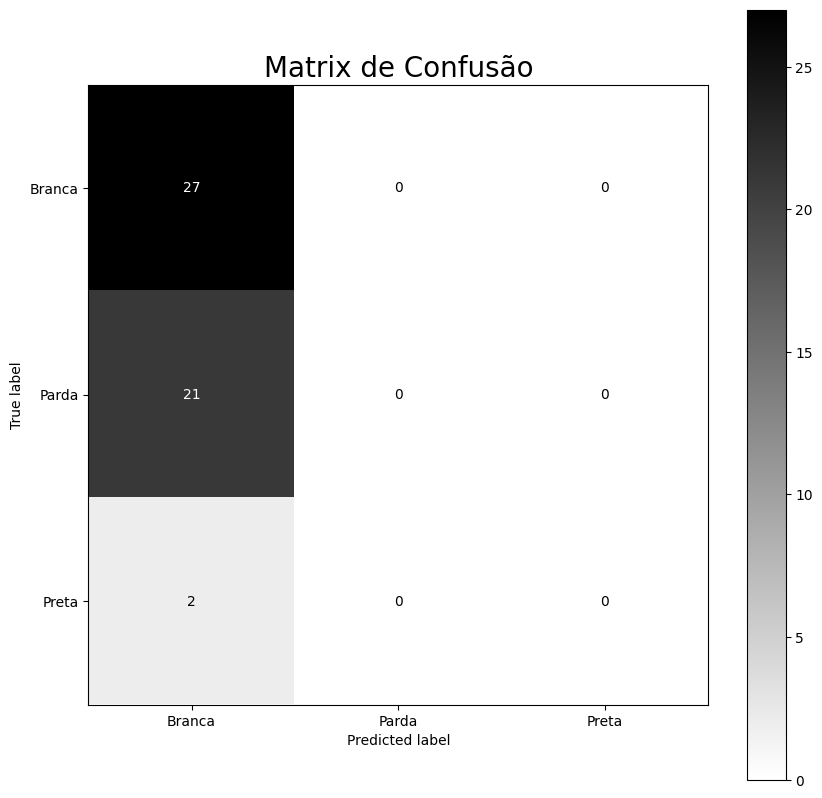

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
labels = ['Branca','Parda','Preta'] #define uma lista de rotulos para as classes

cm = confusion_matrix(y_test_, pred)
disp  = ConfusionMatrixDisplay(cm)
ax.set_title("Matrix de Confusão",fontsize=20)
disp.plot(ax=ax,cmap="binary")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [167]:
with torch.no_grad(): #desativa acomputação de rgadientes
    pred = net(X_test)
    pred = pred.detach().numpy()

    for p, y_ in zip(pred,y_test_):
        print(f"Modelo {p[0]:.2%}, {p[1]:.2%}, {p[2]:.2%}, | Real = {y_}") #Imprime as previsões formatadas como porcentagens para cada classe e o rótulo real.
        #O modelo prevê que a probabilidade de uma amostra pertencer às classes "Branca", "Parda" e "Preta" é 0.00%, 100.00%, e 0.00%, 1 quando de fato for parda

Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 2
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 0.00%, 0.00%, | Real = 0
Modelo 100.00%, 0.00%, 0.00%, | Real = 1
Modelo 100.00%, 

In [168]:
# Möttönen, et al. (2004)
#aqui usamos um método de preparação de estados quânticos
def get_angles(x):
  #calcula os angulosd e rotação do estado quântico a partir do vetor x
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))
#np.linalg.norm(x[2:]) é a norma (magnitude) dos elementos x[2] e x[3]


    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])
#preparanedo um estado quantico
def state_preparation(a):
    qml.RY(a[0], wires=0) #Aplica uma rotação de Pauli-Y no primeiro qubit (qubit 0) com o ângulo s[0]

    qml.CNOT(wires=[0, 1]) #aplica uma porta CNOT entre o qubit 0 (controle) e o qubit 1 (alvo).
    qml.RY(a[1], wires=1)#Aplica uma rotação de Pauli-Y no segundo qubit (qubit 1) com o ângulo a[1]
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

In [169]:
x = np.array(X[0], requires_grad=False)#X é uma matriz/lista e seleciona o primemiro elemento convertendo-o em um array numpy, o False indica que não vai calcular gradientes posteriores
ang = get_angles(x)

dev = qml.device("default.qubit")#definindo um dispositivo de execução quântica usando PennyLane. Ai vamos simular circuitos quânticos em um computador clássico

@qml.qnode(dev)#define um nó quântico
def test(angles):
    state_preparation(angles)#prepara os estados quânticos

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))
#vamos encontrar a probabilidade de encontrar o sistema quântico em cada uma das bases possíveis. (9.99985e-01) indica que há uma probabilidade muito alta de encontrar o sistema na primeira base, enquanto o quarto número (0.00000e+00)

x               :  [2.0089999e+03 1.1000000e+01 2.0000000e+00 0.0000000e+00]
angles          :  [ 0.001991 -0.        0.       -0.005475  0.005475]
amplitude vector:  [9.99985e-01 5.47500e-03 9.96000e-04 0.00000e+00]


In [170]:
print(qml.draw(test)(ang))
#está desenhando o circuito quântico representado pelo nó quântico test com os ângulos específicos contidos em ang
#──RY(-0.00)─: Uma porta de rotação em torno do eixo Y aplicada ao qubit 1 com um ângulo de -0.00.

#╰X──RY(0.00)─: Um gate CNOT onde o qubit 1 é o controle e o qubit 0 é o alvo.

#╰X──RY(-0.01)─: Outra porta CNOT, seguida de uma rotação em torno do eixo Y no qubit 0 com um ângulo de -0.01.

#╰X──RY(0.01)─: Outra porta CNOT, seguida de uma rotação em torno do eixo Y no qubit 1 com um ângulo de 0.01.

0: ──RY(0.00)─╭●────────────╭●──X────────╭●────────────╭●──X────────┤  State
1: ───────────╰X──RY(-0.00)─╰X──RY(0.00)─╰X──RY(-0.01)─╰X──RY(0.01)─┤  State


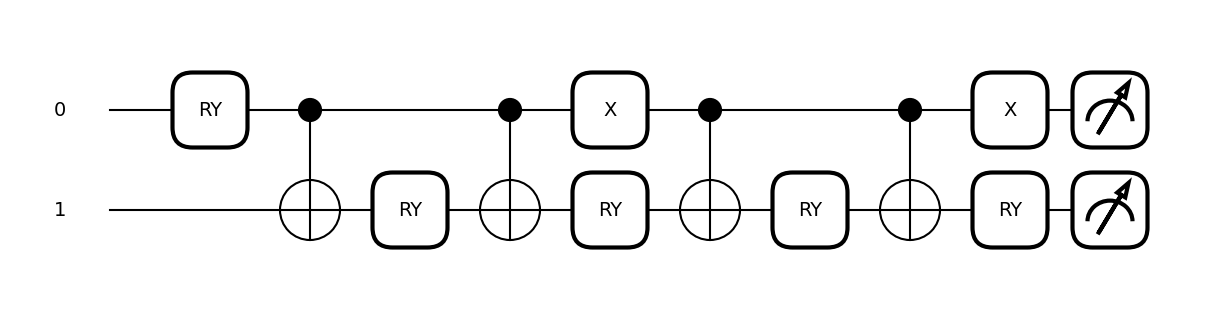

In [171]:
fig, ax = qml.draw_mpl(test)(ang)

In [172]:
#Maneira Prática

@qml.qnode(dev)# decorador que define um nó quântico utilizando dev
def test(f=None):
    qml.AmplitudeEmbedding(features=f, wires=range(2), normalize=True)#codifica o vetor em amplitudes das superposições quçanticas
    return qml.expval(qml.Z(0)), qml.state()#retorna o valor esperado da observável Z no qubit 0 e o estado quântico após a incorporação das características.

res, state = test(f=x)
print(state)
#O primeiro número 9.99984515e-01+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |0⟩ e o qubit 1 também está no estado base |0⟩.

#O segundo número 5.47527609e-03+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |0⟩ e o qubit 1 está no estado base |1⟩.

#O terceiro número 9.95504744e-04+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |1⟩ e o qubit 1 está no estado base |0⟩.

#O último número 0.00000000e+00+0.j corresponde à amplitude de probabilidade do estado onde o qubit 0 está no estado base |1⟩ e o qubit 1 também está no estado base |1⟩.

[9.99984515e-01+0.j 5.47527609e-03+0.j 9.95504744e-04+0.j
 0.00000000e+00+0.j]


In [173]:
print(qml.draw(test)(x))# desenha o circuito qwuântico representado pelo no test e o vetor x

0: ─╭|Ψ⟩─┤  <Z>  State
1: ─╰|Ψ⟩─┤       State


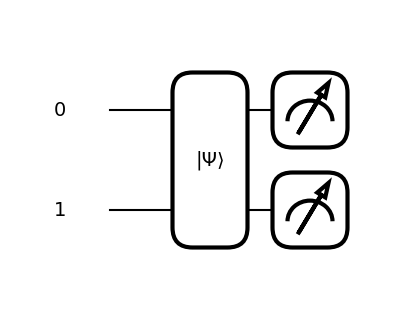

In [174]:
fig, ax = qml.draw_mpl(test)(x)

In [175]:

print("X[0] = ",X[0]) # imprime o primeiro vetor antes da normalização

X = (X.T / np.sqrt(np.sum(X**2,-1))).T#normaliza todos os vetores em X dividindo cada vetor pelo seu comprimento (norma euclidiana)
#X.T transpoe a mwatriz e o resto calcula a euclidiana de cada vetor X
print("X[0] Normalizado = ",X[0])
print(np.sum(X[0]**2))
#Isso imprime a norma euclidiana ao quadrado do primeiro vetor normalizado de X para verificar se o vetor foi normalizado corretamente

X[0] =  tensor([2.0090e+03, 1.1000e+01, 2.0000e+00, 0.0000e+00])


TypeError: sum() received an invalid combination of arguments - got (out=NoneType, axis=int, ), but expected one of:
 * (*, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: out, axis
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [176]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify=y, random_state = 12)

In [177]:
print(X_train.shape)

torch.Size([150, 4])
